In [1]:
import sys, os

import pandas as pd
import numpy as np

from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split, StratifiedKFold

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support

from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sn

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
try:
    data = pd.read_csv('../dataset/clean_bo3_timestamp.csv', converters={'feature':eval}, index_col=0)
except:
    sys.path.append(os.path.realpath('../'))
    data = pd.read_csv('../dataset/clean_bo3_timestamp.csv', converters={'feature':eval}, index_col=0)

data.reset_index(level=0, inplace=True)

data.head(10)

,feature,count,label
0,"(2015-06-01 08:04:00, 2015-06-01 08:05:00, 201...",435,False
1,"(2015-06-01 08:04:00, 2015-06-01 08:07:00, 201...",423,False
2,"(2015-06-01 08:04:00, 2015-06-01 08:07:00, 201...",423,False
3,"(2015-06-01 08:04:00, 2015-06-01 08:05:00, 201...",415,False
4,"(2015-06-01 08:04:00, 2015-06-01 08:05:00, 201...",415,False
5,"(2015-06-01 08:04:00, 2015-06-01 08:08:00, 201...",411,False
6,"(2015-06-01 08:07:00, 2015-06-01 08:08:00, 201...",411,False
7,"(2015-06-01 08:05:00, 2015-06-01 08:07:00, 201...",410,False
8,"(2015-06-01 08:05:00, 2015-06-01 08:07:00, 201...",410,False
9,"(2015-06-01 08:04:00, 2015-06-01 08:07:00, 201...",407,False


In [3]:
data['label'] = data['label'].apply(lambda label: -1 if label == False else 1)

print("N_normal: ",len(data[data['label']==-1]))
print("N_abnormal: ",len(data[data['label']==1]))
data['label'].describe()

N_normal:  3181
N_abnormal:  2712


count    5893.000000
mean       -0.079586
std         0.996913
min        -1.000000
25%        -1.000000
50%        -1.000000
75%         1.000000
max         1.000000
Name: label, dtype: float64

In [5]:
X = data['regions']
y = data['label']

In [4]:
X = data['feature']
y = data['label']

In [5]:
def clf_report(y_true, y_pred):
    print(classification_report(y_true, y_pred, target_names=['Normal','Anomaly']))

    cm = confusion_matrix(y_true,y_pred, labels=[-1,1])    
    df_cm = pd.DataFrame(cm,columns = ['Normal','Anomaly'])
    df_cm = df_cm.rename(index = {0:'Normal',1:'Anomaly'})
    sn.heatmap(df_cm, annot=True, fmt="d")
    plt.show()

    return precision_recall_fscore_support(y_true,y_pred,average='macro')

In [6]:
vectorizer = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [8]:
# X_train_mat = vectorizer.fit_transform(X_train[30:35])
# dataframe = pd.DataFrame(X_train_mat.A, columns=[vectorizer.get_feature_names()])[:30]
# # dataframe['X'] = X_train[30:35].tolist()

# dataframe.index = X_train[30:35].to_numpy()
# dataframe

==================================================1==================================================

Evaluation for training
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00      2544
     Anomaly       1.00      1.00      1.00      2170

    accuracy                           1.00      4714
   macro avg       1.00      1.00      1.00      4714
weighted avg       1.00      1.00      1.00      4714



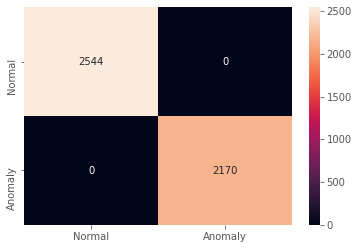

Evaluation for testing
              precision    recall  f1-score   support

      Normal       0.97      1.00      0.99       637
     Anomaly       1.00      0.96      0.98       542

    accuracy                           0.98      1179
   macro avg       0.99      0.98      0.98      1179
weighted avg       0.98      0.98      0.98      1179



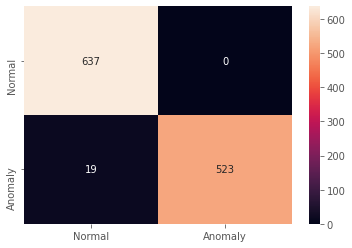


==================================================2==================================================

Evaluation for training
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00      2545
     Anomaly       1.00      1.00      1.00      2169

    accuracy                           1.00      4714
   macro avg       1.00      1.00      1.00      4714
weighted avg       1.00      1.00      1.00      4714



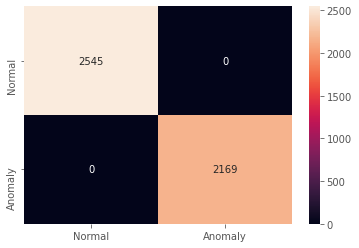

Evaluation for testing
              precision    recall  f1-score   support

      Normal       0.95      1.00      0.98       636
     Anomaly       1.00      0.94      0.97       543

    accuracy                           0.97      1179
   macro avg       0.98      0.97      0.97      1179
weighted avg       0.97      0.97      0.97      1179



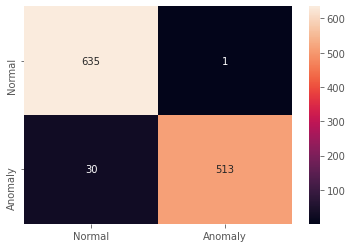


==================================================3==================================================

Evaluation for training
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00      2545
     Anomaly       1.00      1.00      1.00      2169

    accuracy                           1.00      4714
   macro avg       1.00      1.00      1.00      4714
weighted avg       1.00      1.00      1.00      4714



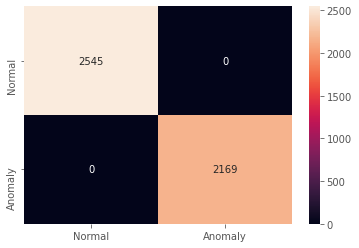

Evaluation for testing
              precision    recall  f1-score   support

      Normal       0.95      1.00      0.98       636
     Anomaly       1.00      0.94      0.97       543

    accuracy                           0.97      1179
   macro avg       0.98      0.97      0.97      1179
weighted avg       0.97      0.97      0.97      1179



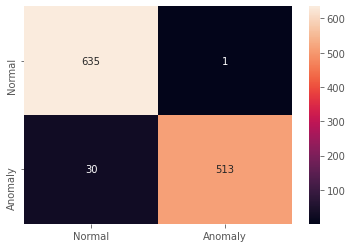


==================================================4==================================================

Evaluation for training
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00      2545
     Anomaly       1.00      1.00      1.00      2170

    accuracy                           1.00      4715
   macro avg       1.00      1.00      1.00      4715
weighted avg       1.00      1.00      1.00      4715



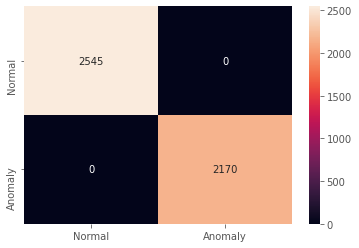

Evaluation for testing
              precision    recall  f1-score   support

      Normal       0.96      1.00      0.98       636
     Anomaly       1.00      0.95      0.97       542

    accuracy                           0.98      1178
   macro avg       0.98      0.98      0.98      1178
weighted avg       0.98      0.98      0.98      1178



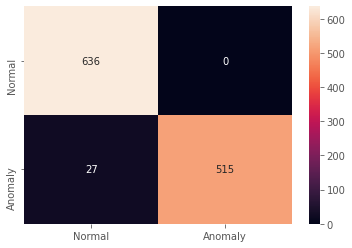


==================================================5==================================================

Evaluation for training
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00      2545
     Anomaly       1.00      1.00      1.00      2170

    accuracy                           1.00      4715
   macro avg       1.00      1.00      1.00      4715
weighted avg       1.00      1.00      1.00      4715



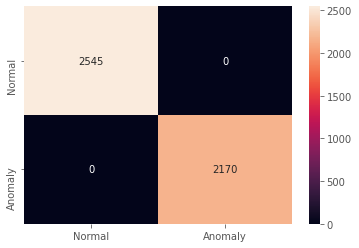

Evaluation for testing
              precision    recall  f1-score   support

      Normal       0.97      1.00      0.98       636
     Anomaly       1.00      0.96      0.98       542

    accuracy                           0.98      1178
   macro avg       0.98      0.98      0.98      1178
weighted avg       0.98      0.98      0.98      1178



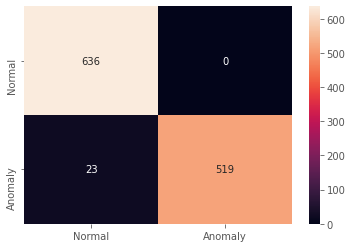

,precision,recall,f1-score,accuracy
training,1.000000,1.000000,1.000000,1.000000
test,0.980129,0.975905,0.977539,0.977771


In [9]:
clf = SVC(C=5.0, kernel='rbf', tol=1e-5, max_iter=-1, random_state=42)

i = 1

precision_train = []
recall_train = []
f1_train = []
acc_train = []

precision_test = []
recall_test = []
f1_test = []
acc_test = []


for train_index, test_index in cv.split(X, y):
    
    print("="*50 + str(i) + "="*50)
    print()

    X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    X_train_mat = vectorizer.fit_transform(X_train)
    X_test_mat = vectorizer.transform(X_test)
    
    clf.fit(X_train_mat,y_train)
#     clf.fit(X_train_mat)
    y_train_pred = clf.predict(X_train_mat)
    y_test_pred = clf.predict(X_test_mat)


    print("Evaluation for training")
    precision,recall,fscore,support = clf_report(y_train,y_train_pred)
    precision_train.append(precision)
    recall_train.append(recall)
    f1_train.append(fscore)
    acc_train.append(accuracy_score(y_train,y_train_pred))


    print("Evaluation for testing")
    precision,recall,fscore,support = clf_report(y_test,y_test_pred)
    precision_test.append(precision)
    recall_test.append(recall)
    f1_test.append(fscore)
    acc_test.append(accuracy_score(y_test,y_test_pred))    
    
    i+=1
    print()
    
mean_precision_train = np.mean(precision_train)
mean_recall_train = np.mean(recall_train)
mean_f1_train = np.mean(f1_train)
mean_acc_train = np.mean(acc_train)

mean_precision_test = np.mean(precision_test)
mean_recall_test = np.mean(recall_test)
mean_f1_test = np.mean(f1_test)
mean_acc_test = np.mean(acc_test)

train_perfm = [mean_precision_train, mean_recall_train, mean_f1_train, mean_acc_train]
test_perfm = [mean_precision_test, mean_recall_test, mean_f1_test, mean_acc_test]

performance = pd.DataFrame([train_perfm, test_perfm], columns = ['precision', 'recall', 'f1-score', 'accuracy'], index=['training','test'])
performance